In [1]:
%cd ..

/home/dawood/Workspace/face-keypoints


In [2]:
import cv2
import torch
import numpy as np

from data.ls3d import LS3D
from models import HRFPN34 as Model

from PIL import Image
from torch.nn import functional as F
from torchvision.transforms import ToTensor as TT
from torchvision.transforms import Resize

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = LS3D('/home/dawood/Datasets/LS3D-W/300W-Testset-3D/', augment=False)

In [4]:
model = Model(68).cuda()
model.load_state_dict(torch.load('/home/dawood/Experiments/face-keypoint621a148180b441248df54c9d2c8de66e/model_best_loss.weights')['state_dict'])

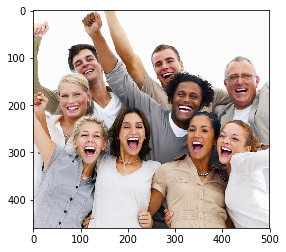

In [17]:
img = Image.open("./test.jpg")
tensor_img = Resize(1024)(img)
tensor_img = TT()(tensor_img)
tensor_img = data.normalize(tensor_img)

plt.imshow(img)

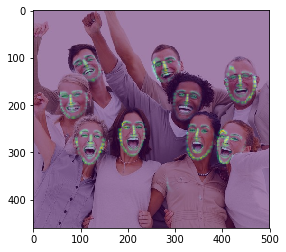

In [18]:
preds = model(tensor_img.unsqueeze(0).cuda())[-1]
w, h  = img.size
preds = F.interpolate(preds, size=(h, w))
preds = preds[0].max(0)[0].cpu().detach()
preds = preds.numpy()
plt.imshow(img)
plt.imshow(preds, alpha=0.5)